<a href="https://colab.research.google.com/github/vionakaleb/colab-python/blob/main/LaptopPricePredict_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('laptopData.csv')

# Display first rows
print('Raw Data:')
print(data.head())


Raw Data:
   Unnamed: 0 Company   TypeName Inches                    ScreenResolution  \
0         0.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1         1.0   Apple  Ultrabook   13.3                            1440x900   
2         2.0      HP   Notebook   15.6                   Full HD 1920x1080   
3         3.0   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4         4.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 600

In [ ]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Transform needed columns, convert to float
data['Ram'] = data['Ram'].str.extract('(\d+)').astype(float)
data['Cpu'] = data['Cpu'].str.extract('([\d.]+)GHz').astype(float)
data['Memory'] = data['Memory'].str.extract('(\d+)').astype(float)
data['Inches'] = data['Inches'].astype(float)

# If price is more than 50000, transform column to 1, else 0
data['Price'] = data['Price'].apply(lambda x: [1, 0] if x > 50000 else [0, 1])

# Select target variable
features = ['Ram', 'Cpu', 'Memory', 'Inches']
target = ['Price']

# Display transformed rows
print('Transformed Data:')
print(data[features + target].head())

Transformed Data:
    Ram  Cpu  Memory  Inches   Price
0   8.0  2.3   128.0    13.3  [1, 0]
1   8.0  1.8   128.0    13.3  [0, 1]
2   8.0  2.5   256.0    15.6  [0, 1]
3  16.0  2.7   512.0    15.4  [1, 0]
4   8.0  3.1   256.0    13.3  [1, 0]


In [ ]:
# Split the dataset into training and testing sets
train_size = int(len(data))
train, test = data[:train_size], data[train_size:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Reshape data
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1]))

y_train_0 = y_train.values.reshape((y_train.shape[0], y_train.shape[1]))

# Transform y_train_0 data
y_train_1 = [item[0] for item in y_train_0]

# Convert y_train_1 data to a list of arrays
y_train_2 = [np.array(item) for item in y_train_1]

# Transform y_train_2 to be numpy array
y_train = np.array(y_train_2)

print(train_size)
print(X_train)
print(y_train)

1270
[[  8.    2.3 128.   13.3]
 [  8.    1.8 128.   13.3]
 [  8.    2.5 256.   15.6]
 ...
 [  2.    1.6  64.   14. ]
 [  6.    2.5   1.   15.6]
 [  4.    1.6 500.   15.6]]
[[1 0]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [ ]:
# Build the Dense layer model
model = Sequential()
model.add(Dense(len(X_train[0]), activation='relu', input_shape=X_train[0].shape))
model.add(Dense(len(X_train[0]), activation='relu'))
model.add(Dense(len(y_train[0,:]), activation='sigmoid'))

# Train the model using 100 epochs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 28.6369 - accuracy: 0.5181
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 21.5491 - accuracy: 0.5220
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 15.8293 - accuracy: 0.5866
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 11.1209 - accuracy: 0.6591
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 7.1076 - accuracy: 0.6811
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 3.3683 - accuracy: 0.6921
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9313 - accuracy: 0.5252
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.6039
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.8126
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.8339
Epoch

In [ ]:
# Predict using the trained model
p = model.predict(X_train)

scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
row = "| {no:<4d} [ {p1:.2f} {p2:.2f} ] [ {r1:.2f} {r2:.2f} ]".format
for i in range(len(X_train)):
    print(row(no=i, p1=p[i,0], p2=p[i,1], r1=y_train[i,0], r2=y_train[i,1])) #80-95%

# Scale the features and target variable
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Inverse transform each prediction in p
p_inverse = np.zeros_like(p)  # Create an array to store the inverse transformed predictions

for i in range(p.shape[1]):
    p_inverse[:, i] = scaler.fit_transform(p[:, i].reshape(-1, 1)).reshape(-1)

# Inverse transform the predictions to the original scale
# p = scaler.inverse_transform(p)

40/40 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8433
accuracy: 84.33%
| 0    [ 0.84 0.16 ] [ 1.00 0.00 ]
| 1    [ 0.80 0.20 ] [ 0.00 1.00 ]
| 2    [ 0.78 0.22 ] [ 0.00 1.00 ]
| 3    [ 1.00 0.00 ] [ 1.00 0.00 ]
| 4    [ 0.92 0.08 ] [ 1.00 0.00 ]
| 5    [ 0.29 0.71 ] [ 0.00 1.00 ]
| 6    [ 1.00 0.00 ] [ 1.00 0.00 ]
| 7    [ 0.85 0.15 ] [ 1.00 0.00 ]
| 8    [ 1.00 0.00 ] [ 1.00 0.00 ]
| 9    [ 0.79 0.21 ] [ 0.00 1.00 ]
| 10   [ 0.23 0.77 ] [ 0.00 1.00 ]
| 11   [ 0.18 0.82 ] [ 0.00 1.00 ]
| 12   [ 1.00 0.00 ] [ 1.00 0.00 ]
| 13   [ 0.16 0.84 ] [ 0.00 1.00 ]
| 14   [ 0.86 0.14 ] [ 1.00 0.00 ]
| 15   [ 0.88 0.12 ] [ 1.00 0.00 ]
| 16   [ 0.80 0.20 ] [ 0.00 1.00 ]
| 17   [ 1.00 0.00 ] [ 1.00 0.00 ]
| 18   [ 0.16 0.84 ] [ 0.00 1.00 ]
| 19   [ 0.78 0.22 ] [ 1.00 0.00 ]
| 20   [ 0.72 0.28 ] [ 1.00 0.00 ]
| 21   [ 0.16 0.84 ] [ 0.00 1.00 ]
| 22   [ 0.83 0.17 ] [ 0.00 1.00 ]
| 23   [ 0.71 0.29 ] [ 0.00 1.00 ]
| 24   [ 0.16 0.84 ] [ 0.00 1.00 ]
| 25   [ 0.78 0.22 ] 

[[0.84168756 0.1583808 ]
 [0.79756296 0.20249459]
 [0.784586   0.21546738]
 ...
 [0.1568879  0.8429487 ]
 [0.1568879  0.8429487 ]
 [0.1568879  0.8429487 ]]


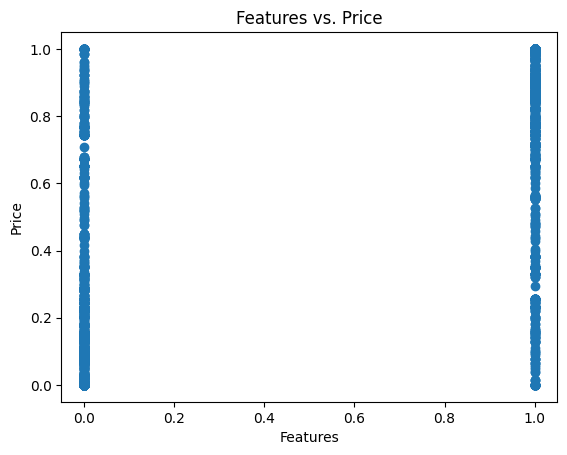

In [ ]:
print(p)

# Visualize the model
plt.scatter(y_train, p_inverse)
plt.xlabel('Features')
plt.ylabel('Price')
plt.title('Features vs. Price')
plt.show()

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 4)                 20        
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 2)                 10        
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
